In [99]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [100]:
df=pd.read_csv('DM_mushrooms.csv')

In [101]:
# DELETING Duplicate rows
df.drop_duplicates()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [102]:
# # ENCODING Categorical data into Numerical
# df['class'].replace(['e','p'], [0,1], inplace=True)
# df['cap-shape'].replace(['x','f','k','b','s','c'], [0,1,2,3,4,5], inplace=True)
# df['cap-surface'].replace(['y','s','f','g'], [0,1,2,3], inplace=True)
# df['cap-color'].replace(['n','g','e','y','w','b','p','c','u','r'], [0,1,2,3,4,5,6,7,8,9], inplace=True)
# df['bruises'].replace(['f','t'], [0,1], inplace=True)
# df['odor'].replace(['n','f','y','s','a','l','p','c','m'], [0,1,2,3,4,5,6,7,8], inplace=True)
# df['gill-attachment'].replace(['f','a'], [0,1], inplace=True)
# df['gill-spacing'].replace(['c','w'], [0,1], inplace=True)
# df['gill-size'].replace(['b','n'], [0,1], inplace=True)
# df['gill-color'].replace(['b','p','w','n','g','h','u','k','e','y','o','r'], [0,1,2,3,4,5,6,7,8,9,10,11], inplace=True)
# df['stalk-shape'].replace(['t','e'], [0,1], inplace=True)
# df['stalk-root'].replace(['b','e','c','r'], [0,1,2,3], inplace=True)
# df['stalk-surface-above-ring'].replace(['s','k','f','y'], [0,1,2,3], inplace=True)
# df['stalk-surface-below-ring'].replace(['s','k','f','y'], [0,1,2,3], inplace=True)
# df['stalk-color-above-ring'].replace(['w','p','g','n','b','o','e','c','y'], [0,1,2,3,4,5,6,7,8], inplace=True)
# df['stalk-color-below-ring'].replace(['w','p','g','n','b','o','e','c','y'], [0,1,2,3,4,5,6,7,8], inplace=True)
# df['ring-type'].replace(['p','e','l','f','n'], [0,1,2,3,4], inplace=True)
# df['veil-type'].replace(['p'], [0], inplace=True)
# df['veil-color'].replace(['w','n','o','y'], [0,1,2,3], inplace=True)
# df['ring-number'].replace(['o','t','n'], [0,1,2], inplace=True)
# df['spore-print-color'].replace(['w','n','k','h','r','u','o','y','b'], [0,1,2,3,4,5,6,7,8], inplace=True)
# df['population'].replace(['v','y','s','n','a','c'], [0,1,2,3,4,5], inplace=True)
# df['habitat'].replace(['d','g','p','l','u','m','w'], [0,1,2,3,4,5,6], inplace=True)
labelEncoder = LabelEncoder()
df['class'] = labelEncoder.fit_transform(df['class'])
df['cap-shape'] = labelEncoder.fit_transform(df['cap-shape'])
df['cap-surface'] = labelEncoder.fit_transform(df['cap-surface'])
df['cap-color'] = labelEncoder.fit_transform(df['cap-color'])
df['bruises'] = labelEncoder.fit_transform(df['bruises'])
df['odor'] = labelEncoder.fit_transform(df['odor'])
df['gill-attachment'] = labelEncoder.fit_transform(df['gill-attachment'])
df['gill-spacing'] = labelEncoder.fit_transform(df['gill-spacing'])
df['gill-size'] = labelEncoder.fit_transform(df['gill-size'])
df['gill-color'] = labelEncoder.fit_transform(df['gill-color'])
df['stalk-shape'] = labelEncoder.fit_transform(df['stalk-shape'])
df['stalk-root'] = labelEncoder.fit_transform(df['stalk-root'])
df['stalk-surface-above-ring'] = labelEncoder.fit_transform(df['stalk-surface-above-ring'])
df['stalk-surface-below-ring'] = labelEncoder.fit_transform(df['stalk-surface-below-ring'])
df['stalk-color-above-ring'] = labelEncoder.fit_transform(df['stalk-color-above-ring'])
df['stalk-color-below-ring'] = labelEncoder.fit_transform(df['stalk-color-below-ring'])
df['ring-type'] = labelEncoder.fit_transform(df['ring-type'])
df['veil-type'] = labelEncoder.fit_transform(df['veil-type'])
df['veil-color'] = labelEncoder.fit_transform(df['veil-color'])
df['ring-number'] = labelEncoder.fit_transform(df['ring-number'])
df['spore-print-color'] = labelEncoder.fit_transform(df['spore-print-color'])
df['population'] = labelEncoder.fit_transform(df['population'])
df['habitat'] = labelEncoder.fit_transform(df['habitat'])

In [103]:
# Converting '?' to nulls before filling them with the mean
df.replace(to_replace='?', value=np.nan, inplace=True)
df['stalk-root'].fillna(value=df['stalk-root'].mean(), inplace=True)

In [104]:
# Data splitting
# a,b split (Unfiltered Dataset)
a = df.iloc[:, 1:].values
b = df.iloc[:, 0].values



In [105]:
# Training set and Test set
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=1)
print("Number transactions x_train dataset: ", a_train.shape)
print("Number transactions y_train dataset: ", b_train.shape)
print("Number transactions x_test dataset: ", a_test.shape)
print("Number transactions y_test dataset: ", b_test.shape)

Number transactions x_train dataset:  (6499, 22)
Number transactions y_train dataset:  (6499,)
Number transactions x_test dataset:  (1625, 22)
Number transactions y_test dataset:  (1625,)


In [106]:
# Data Visualization
# M_cols = df.columns.to_list()
# print("Value Distribution:\n")
# for col in M_cols[1:]:
#     plt.figure(figsize=(30,20))
#     plt.subplot(2,3,1)
#     sns.countplot(x=col ,hue='class', data=df ,palette='viridis_r')
#     plt.xlabel(col, fontsize=20)
#     plt.legend(loc='upper left')
#     plt.show()


In [107]:
# DELETING unwanted columns
Del_cols = ['gill-attachment', 'veil-type']
ds = df.copy()
for col in Del_cols:
    ds = ds.drop(col, axis=1)

In [108]:
# Data splitting
# x,y split (Filtered Dataset)
x = ds.iloc[:, 1:].values
y = ds.iloc[:, 0].values

In [109]:
# Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (6499, 20)
Number transactions y_train dataset:  (6499,)
Number transactions x_test dataset:  (1625, 20)
Number transactions y_test dataset:  (1625,)


In [110]:
#Naive Bayes lab way + Accuracy (Filtered)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
res = gnb.fit(x_train,y_train).predict(x_test)
accuracy = accuracy_score(y_test , res)
print ("Test Accuracy:",accuracy*100,"%")

Test Accuracy: 92.43076923076923 %


In [111]:
# #Naive Bayes lab way + Accuracy (Unfiltered)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
res = gnb.fit(a_train,b_train).predict(a_test)
accuracy = accuracy_score(b_test , res)
print ("Test Accuracy:",accuracy*100,"%")

Test Accuracy: 91.63076923076923 %


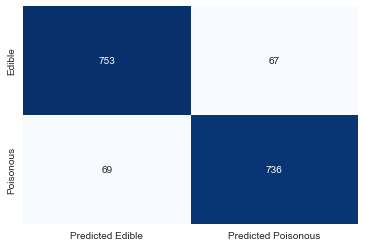

In [112]:
# Naive Bayes Confusion Matrix (Unfiltered)
b_pred = gnb.predict(a_test)
b_true_lr = b_test
cm = confusion_matrix(b_test, b_pred) #y_test,nb.predict(x_test)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', cbar=False, yticklabels=['Edible', 'Poisonous'],
            xticklabels=['Predicted Edible', 'Predicted Poisonous'])
plt.show()

In [113]:
#SVM + Accuracy (Unfiltered)
from sklearn.svm import SVC
svm1 = SVC(random_state=42, gamma="auto")
svm1.fit(a_train,b_train)
svm1.score(a_test,b_test)
accuracy = svm1.score(a_test,b_test)
print ("Test Accuracy:",accuracy*100,"%")

Test Accuracy: 100.0 %


In [114]:
#SVM + Accuracy (Filtered)
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(x_train,y_train)
svm.score(x_test,y_test)
accuracy = svm.score(x_test,y_test)
print ("Test Accuracy:",accuracy*100,"%")

Test Accuracy: 100.0 %


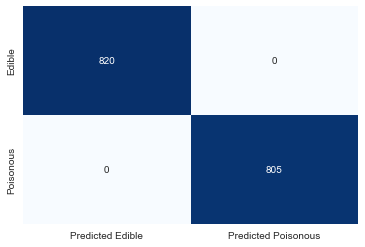

In [115]:
#SVM Confusion Matrix (Filtered)
from sklearn.metrics import confusion_matrix
y_pred = svm.predict(x_test)
y_true_lr = y_test
cm = confusion_matrix(y_test, y_pred) #y_test,nb.predict(x_test)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', cbar=False, yticklabels=['Edible', 'Poisonous'],
            xticklabels=['Predicted Edible', 'Predicted Poisonous'])
plt.show()

In [116]:
#KNN ALGORITHM
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier

best_Kvalue = 0
best_score = 0

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(a_train, b_train)
    if knn.score(a_test, b_test) > best_score:
        best_score = knn.score(a_train, b_train)
        best_Kvalue = i
print("""Best KNN Value: {}
Test Accuracy: {}%""".format(best_Kvalue, (best_score * 100)))

Best KNN Value: 1
Test Accuracy: 100.0%


In [117]:
#KNN ALGORITHM WITH ACCURACY
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier

best_Kvalue = 0
best_score = 0

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    if knn.score(x_test, y_test) > best_score:
        best_score = knn.score(x_train, y_train)
        best_Kvalue = i
print("""Best KNN Value: {}
Test Accuracy: {}%""".format(best_Kvalue,(best_score * 100)))

Best KNN Value: 1
Test Accuracy: 100.0%


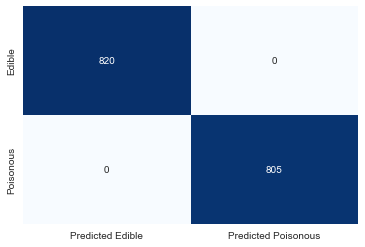

In [134]:
# from sklearn.metrics import confusion_matrix
# x_pred = knn.predict(x_test)
# y_true_lr = y_test
# cm = confusion_matrix(y_test, y_pred) #y_test,nb.predict(x_test)
# sns.heatmap(cm, cmap='Purples', annot=True, fmt='d', cbar=False, yticklabels=['Edible', 'Poisonous'],
#             xticklabels=['Predicted Edible', 'Predicted Poisonous'])
# plt.show()
x_pred = knn.predict(x_test)
x_true_lr = y_test
cm = confusion_matrix(y_test, y_pred) #y_test,nb.predict(x_test)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', cbar=False, yticklabels=['Edible', 'Poisonous'],
            xticklabels=['Predicted Edible', 'Predicted Poisonous'])
plt.show()

In [119]:
# from matplotlib.colors import ListedColormap
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
# from sklearn.pipeline import Pipeline
# from sklearn.inspection import DecisionBoundaryDisplay
#
# n_neighbors = 1
# cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
# name=["KNN"]
# classifier = [
#     Pipeline(
#         [
#             ("scaler", StandardScaler()),
#             ("knn", KNeighborsClassifier(n_neighbors=n_neighbors)),
#         ]
#     ),]
# for name, clf in zip(name, classifier):
#
#     clf.fit(x_train, y_train)
#     score = clf.score(x_test, y_test)
#     ax = plt.subplots()
#     DecisionBoundaryDisplay.from_estimator(
#         clf,
#         x,
#         cmap=cmap_light,
#         alpha=0.8,
#         ax=ax,
#         response_method="predict",
#         plot_method="pcolormesh",
#         shading="auto",
#     )
#     plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_light, edgecolor="k", s=20)
#     plt.title("{} (k = {})".format(name, n_neighbors))
#     plt.text(
#         0.9,
#         0.1,
#         "{:.2f}".format(score),
#         size=15,
#         ha="center",
#         va="center",
#         transform=plt.gca().transAxes,
#     )
#     plt.show()

In [120]:
from sklearn.linear_model import LogisticRegression

## lr = LogisticRegression(solver="lbfgs")
lr = LogisticRegression(solver="liblinear")
lr.fit(a_train,b_train)

print("Test Accuracy: {}%".format((lr.score(a_test,b_test)*100)))


Test Accuracy: 94.83076923076923%


In [121]:
from sklearn.linear_model import LogisticRegression

## lr = LogisticRegression(solver="lbfgs")
lr = LogisticRegression(solver="liblinear")
lr.fit(x_train,y_train)

print("Test Accuracy: {}%".format((lr.score(x_test,y_test)*100)))

Test Accuracy: 94.95384615384616%


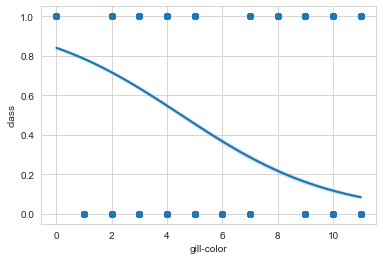

In [122]:
sns.regplot(x='gill-color',y='class',data=ds,logistic=True)
plt.show()

In [125]:
clf1 = DecisionTreeClassifier(max_depth=3)
clf1 = clf1.fit(a_train,b_train )
print("Test Accuracy: {}%".format(round(clf1.score(a_test,b_test)*100,2)))

Test Accuracy: 96.68%


In [126]:
featuren=['cap-shape' , 'cap-surface','cap-color','bruises','odor','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
cn=['p', 'e']

[Text(167.4, 190.26, 'gill-color <= 3.5\ngini = 0.499\nsamples = 6499\nvalue = [3388, 3111]\nclass = p'), Text(83.7, 135.9, 'population <= 3.5\ngini = 0.278\nsamples = 2628\nvalue = [439, 2189]\nclass = e'), Text(41.85, 81.53999999999999, 'spore-print-color <= 1.5\ngini = 0.22\nsamples = 468\nvalue = [409, 59]\nclass = p'), Text(20.925, 27.180000000000007, 'gini = 0.0\nsamples = 41\nvalue = [0, 41]\nclass = e'), Text(62.775000000000006, 27.180000000000007, 'gini = 0.081\nsamples = 427\nvalue = [409, 18]\nclass = p'), Text(125.55000000000001, 81.53999999999999, 'stalk-root <= 2.0\ngini = 0.027\nsamples = 2160\nvalue = [30, 2130]\nclass = e'), Text(104.625, 27.180000000000007, 'gini = 0.01\nsamples = 2141\nvalue = [11, 2130]\nclass = e'), Text(146.475, 27.180000000000007, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]\nclass = p'), Text(251.10000000000002, 135.9, 'spore-print-color <= 1.5\ngini = 0.363\nsamples = 3871\nvalue = [2949, 922]\nclass = p'), Text(209.25, 81.53999999999999, 'odor <

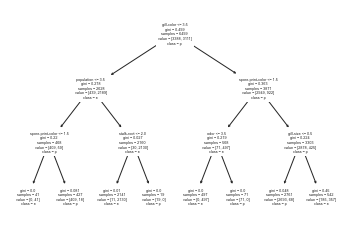

In [127]:
clf = DecisionTreeClassifier(max_depth=3, random_state=1)
clf = clf.fit(x_train,y_train )
print (plot_tree(clf, feature_names=featuren , class_names=cn))

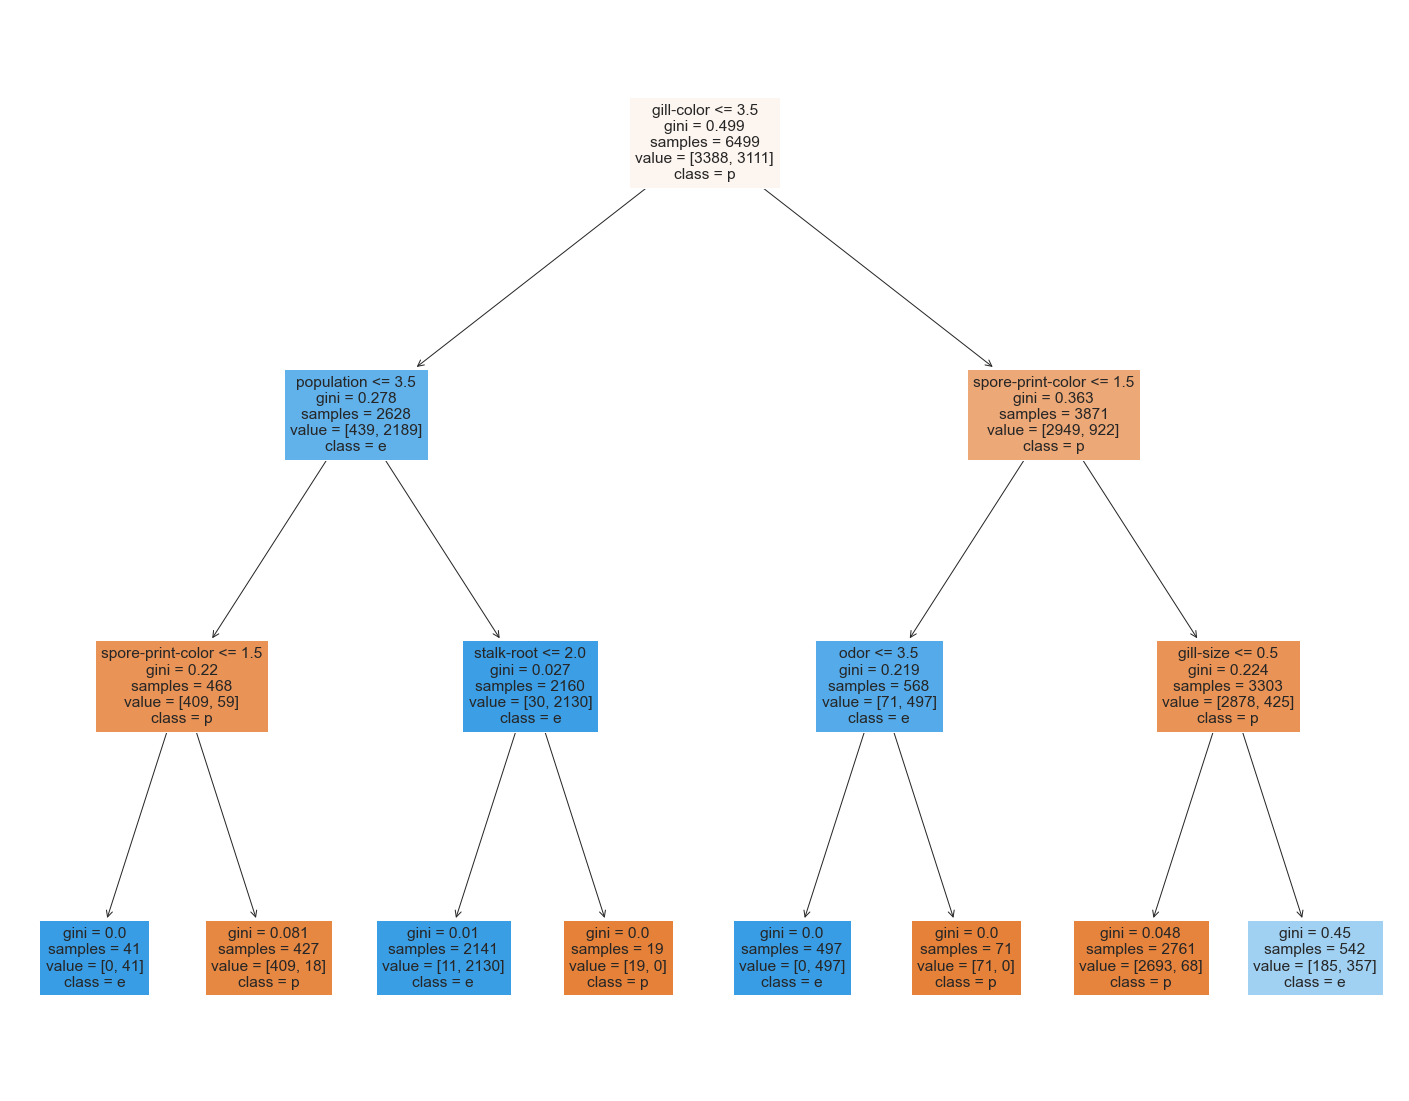

In [128]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=featuren,  filled=True, class_names=cn)

In [129]:
print("Test Accuracy: {}%".format(round(clf.score(x_test,y_test)*100,2)))

Test Accuracy: 96.68%


In [130]:
res =clf.predict(x_test)
print (res)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, res)
print ("Test Accuracy:",accuracy*100,"%")

[0 1 1 ... 1 0 0]
Test Accuracy: 96.67692307692307 %


In [131]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf1=rf.fit(x_train,y_train)

In [132]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf1=rf.fit(x_train,y_train)

In [133]:
res1 =rf1.predict(x_test)
print (res1)
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test, res1)
print ("Test Accuracy:",accuracy1*100,"%")

[0 1 1 ... 1 0 0]
Test Accuracy: 100.0 %
